In [4]:
#!pip install -U pandas matplotlib
import pandas as pd
Dec2019=pd.read_csv('20191201_.csv')
Jan2020=pd.read_csv('20200101_.csv')
Feb2020=pd.read_csv('20200201_.csv')
Mar2020=pd.read_csv('20200301_.csv')
Apr2020=pd.read_csv('20200401_.csv')
May2020=pd.read_csv('20200501_.csv')
Jun2020=pd.read_csv('20200601_.csv')
Jul2020=pd.read_csv('20200701_.csv')
Aug2020=pd.read_csv('20200801_.csv')
#月をまたぐたびに追加↑も↓も

Daily=pd.concat([Dec2019,Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020,Aug2020],ignore_index=True)\
        .rename(columns={'日付':'Lastday_of_the_week','Tweets published':'Tweets-done','インプレッション':'Impression','リツイート':'Retweets','いいね':'Like','エンゲージメント率':'EngagementRate'})\
        .query('Lastday_of_the_week >= "2019-12-18"')

Daily['Lastday_of_the_week']=pd.to_datetime(Daily['Lastday_of_the_week']) 
Daily.set_index('Lastday_of_the_week',inplace=True) #DatetimeIndexに変換、時系列データとして処理可能に
Weekly=Daily.resample('W-TUE').sum() #('W-WED',closed='left',label='left')で水曜開始で週束ね表示
week_num = pd.RangeIndex(start=1, stop=len(Weekly.index) + 1, step=1)

#ここふたつ、毎週ハンド入力
count_days=[7,3,7,5,2,3,4,5,1,3,4,6,3,6,6,0,4,4,2,2,1,4,1,2,2,2,3,5,5,5,6,5,4,1]
count_minutes=[130,60,105,80,60,35,95,75,10,50,105,120,300,765,285,0,95,75,40,30,45,150,30,75,75,60,390,460,330,510,630,330,420,120]

Weekly.insert(0,'Week-No.',week_num)
Weekly.insert(1,'Days-done',count_days)
Weekly.insert(2,'Minutes-done',count_minutes)
Weekly.head()

,Week-No.,Days-done,Minutes-done,Tweets-done,Impression,エンゲージメント,EngagementRate,Retweets,返信,Like,...,詳細クリック,固定リンクのクリック数,アプリ表示,アプリインストール,フォローしている,ツイートをメール送信,ダイアル式電話,メディアの再生数,メディアのエンゲージメント,メディアのエンゲージメント数
Lastday_of_the_week,,,,,,,,,,,,,,,,,,,,,
2019-12-24,1,7,130,11,803,34,0.286377,4,0,9,...,3,0,0,0,0,0,0,9,9.0,0.0
2019-12-31,2,3,60,9,690,35,0.300968,1,0,3,...,16,0,0,0,0,0,0,9,9.0,0.0
2020-01-07,3,7,105,11,2002,87,0.287217,6,1,20,...,12,0,0,0,0,0,0,38,38.0,0.0
2020-01-14,4,5,80,7,1986,51,0.180697,14,0,8,...,6,0,0,0,0,0,0,18,18.0,0.0
2020-01-21,5,2,60,7,1418,53,0.224714,14,0,13,...,8,0,0,0,0,0,0,15,15.0,0.0


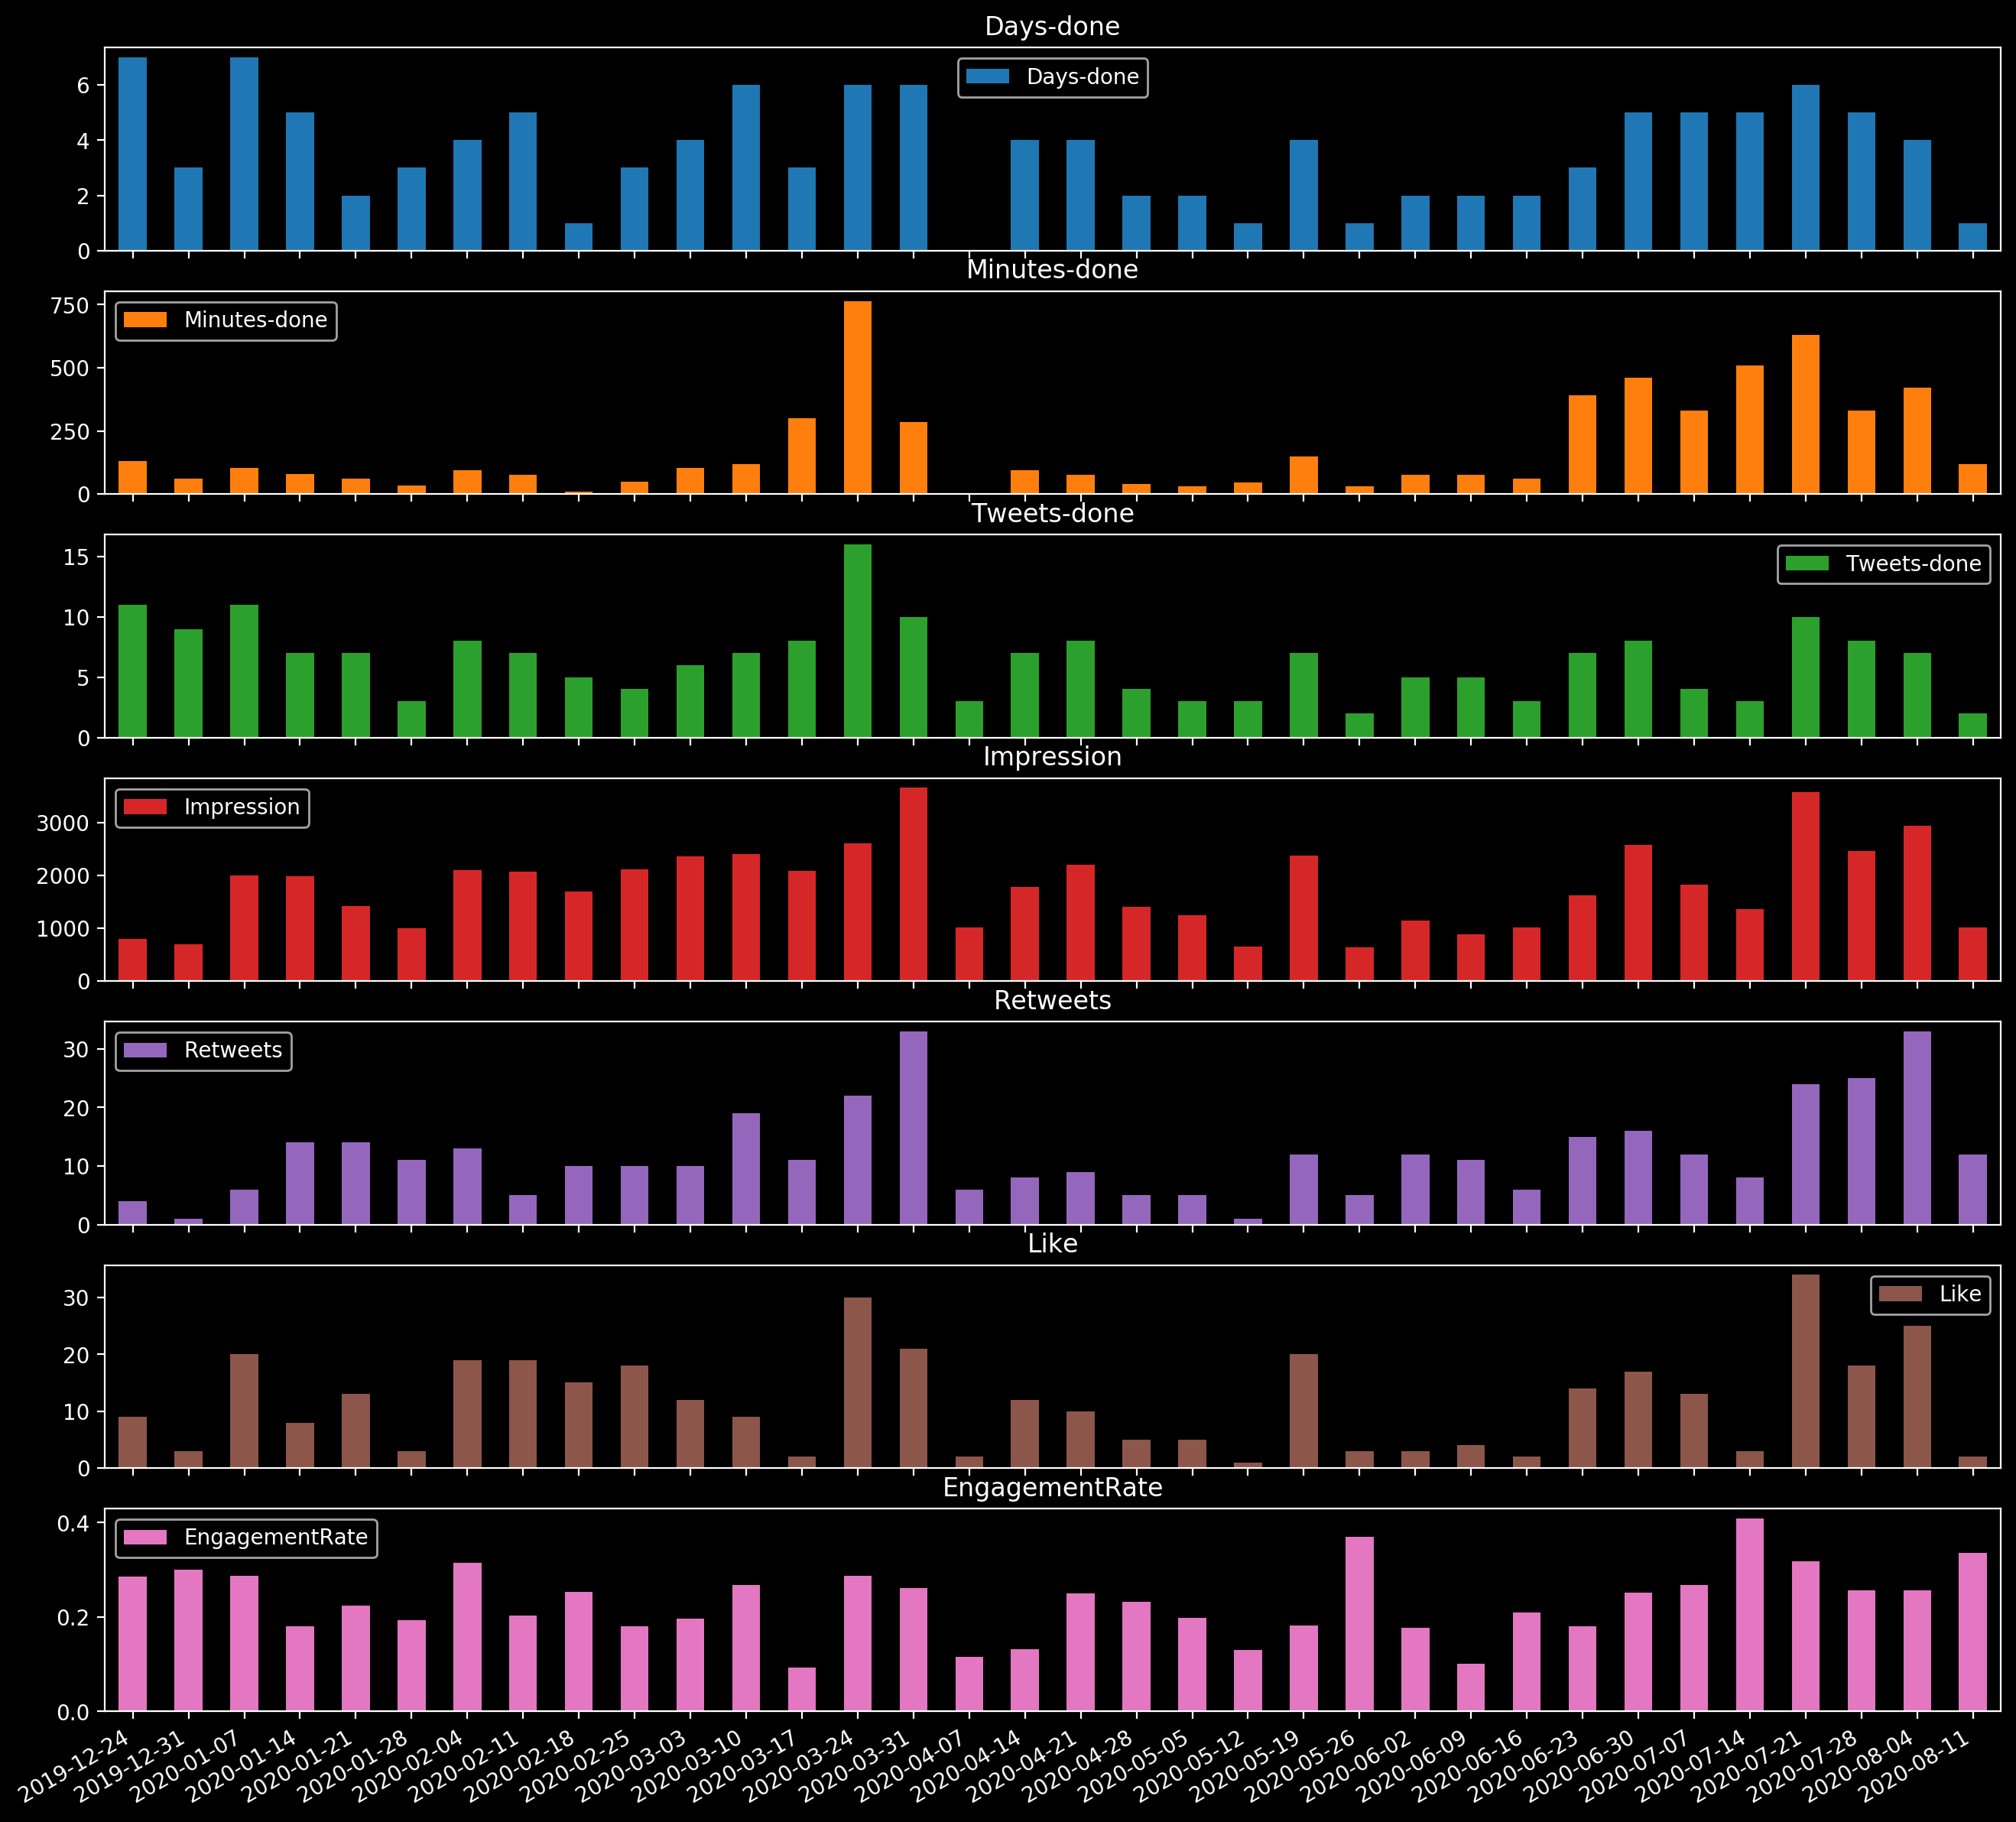

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

Weekly_done=Weekly.loc[:,['Days-done','Minutes-done','Tweets-done','Impression','Retweets','Like','EngagementRate']]
Weekly_done.index=Weekly_done.index.format() #x軸のDatetimeIndexがタイムスタンプとして表示されるのを、短縮文字列yyyy-mm-ddに変換
Weekly_done.plot.bar(figsize=(16,16),subplots=True)
plt.gcf().autofmt_xdate() #x軸を斜めに見やすく
plt.savefig('Weekly-done.png')

In [32]:
#自由に集計する用
Weekly[['Days-done','Minutes-done','Tweets-done','Impression','Retweets','Like']]\
.sum().reset_index().rename(columns={0 : 'Cumulative'}).set_index('index', drop=True)

,Cumulative
index,
Days-done,102
Minutes-done,4130
Tweets-done,188
Impression,49374
Retweets,306
Like,312
